# Uncorrelated Stochastic

In [1]:
# numeric experiment
import numpy as np
from tqdm import tqdm

def Experiment_SequentialPulling(C, d1, d2, r1, r2, random_seed, n_experiment):
    np.random.seed(random_seed)
    # the interval between neighbour consumption
    interval_consumption_1 = np.random.geometric(d1, size=(n_experiment, C))
    interval_consumption_2 = np.random.geometric(d2, size=(n_experiment, C))

    # at which round the demand is 1
    round_consumption_1 = np.cumsum(interval_consumption_1, axis=1)
    round_consumption_2 = np.cumsum(interval_consumption_2, axis=1)

    count_arm_1 = np.zeros(shape=n_experiment, dtype=int)
    count_arm_2 = np.zeros(shape=n_experiment, dtype=int)
    for c_count in range(1, C + 1):
        arm_index = (
            round_consumption_1[np.arange(0, n_experiment), count_arm_1]
            <= round_consumption_2[np.arange(0, n_experiment), count_arm_2]
        )
        count_arm_1[arm_index] = count_arm_1[arm_index] + 1
        count_arm_2[~arm_index] = count_arm_2[~arm_index] + 1
    stopping_time = np.maximum(
        round_consumption_1[np.arange(0, n_experiment), count_arm_1 - 1],
        round_consumption_2[np.arange(0, n_experiment), count_arm_2 - 1],
    )
    assert np.min(round_consumption_1) > 0, "numeric error"
    assert np.min(round_consumption_2) > 0, "numeric error"
    assert np.min(stopping_time) > 0, "numeric error"

    arm_1_total_reward = np.array([np.random.binomial(T, r1) for T in tqdm(stopping_time)])
    arm_2_total_reward = np.array([np.random.binomial(T, r2) for T in tqdm(stopping_time)])
    
    if r1 > r2:
        success_rate = np.sum(arm_1_total_reward > arm_2_total_reward) / n_experiment
    else:
        success_rate = np.sum(arm_1_total_reward < arm_2_total_reward) / n_experiment
    
    return success_rate, count_arm_1, count_arm_2

# d_list = np.geomspace(start=1e-1, stop=1e-3, num=40)
d_inverse_list = np.linspace(start=1 / 1e-1, stop=1 / 1e-3, num=40)
d_list = 1 / d_inverse_list

n_experiment = 10000000
random_seed = 12345
success_list = np.zeros(len(d_list))
for ii, d in enumerate(d_list):
    r1 = 0.5
    r2 = 0.4
    d1 = d
    d2 = d
    C = 2
    success_rate, _, _ = Experiment_SequentialPulling(C, d1, d2, r1, r2, random_seed, n_experiment)
    print(f"d={d} done")
    success_list[ii] = success_rate
    
print(success_list)

100%|██████████| 10000000/10000000 [00:37<00:00, 263458.09it/s]


d=0.1 done


100%|██████████| 10000000/10000000 [00:39<00:00, 256390.35it/s]


d=0.02826086956521739 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259869.42it/s]


d=0.016455696202531647 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259540.65it/s]


d=0.011607142857142858 done


100%|██████████| 10000000/10000000 [00:39<00:00, 251666.10it/s]


d=0.008965517241379312 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258598.15it/s]


d=0.007303370786516855 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262266.34it/s]


d=0.006161137440758294 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258029.98it/s]


d=0.005327868852459017 done


100%|██████████| 10000000/10000000 [00:39<00:00, 255373.01it/s]


d=0.004693140794223827 done


100%|██████████| 10000000/10000000 [00:39<00:00, 253371.03it/s]


d=0.004193548387096774 done


100%|██████████| 10000000/10000000 [00:39<00:00, 254350.99it/s]


d=0.003790087463556852 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257063.73it/s]


d=0.0034574468085106385 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260074.43it/s]


d=0.0031784841075794623 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262057.19it/s]


d=0.0029411764705882353 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261808.87it/s]


d=0.002736842105263158 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262352.75it/s]


d=0.002559055118110236 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261545.65it/s]


d=0.002402957486136784 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259827.32it/s]


d=0.002264808362369338 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261410.88it/s]


d=0.00214168039538715 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258617.43it/s]


d=0.00203125 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262619.85it/s]


d=0.0019316493313521548 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258478.02it/s]


d=0.0018413597733711047 done


100%|██████████| 10000000/10000000 [00:37<00:00, 263201.90it/s]


d=0.0017591339648173208 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261871.10it/s]


d=0.001683937823834197 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260827.46it/s]


d=0.0016149068322981368 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261024.44it/s]


d=0.001551312649164678 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261810.28it/s]


d=0.0014925373134328358 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257692.62it/s]


d=0.0014380530973451327 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259357.04it/s]


d=0.0013874066168623267 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262794.28it/s]


d=0.0013402061855670104 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262062.92it/s]


d=0.001296111665004985 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262844.31it/s]


d=0.0012548262548262548 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262622.90it/s]


d=0.0012160898035547241 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261291.29it/s]


d=0.0011796733212341198 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261521.35it/s]


d=0.0011453744493392071 done


100%|██████████| 10000000/10000000 [00:37<00:00, 264425.52it/s]


d=0.001113013698630137 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261295.52it/s]


d=0.0010824313072439634 done


100%|██████████| 10000000/10000000 [00:37<00:00, 263644.42it/s]


d=0.001053484602917342 done


100%|██████████| 10000000/10000000 [00:37<00:00, 265146.96it/s]


d=0.001026045777426993 done


100%|██████████| 10000000/10000000 [00:38<00:00, 263035.93it/s]


d=0.001 done
[0.6413452 0.8125628 0.875781  0.9094624 0.93028   0.9442361 0.9543761
 0.9616932 0.9672733 0.9718137 0.975362  0.9781873 0.9806633 0.9826762
 0.9843993 0.9858807 0.9871281 0.9882822 0.9892174 0.9900232 0.9908115
 0.9914951 0.9920931 0.9926055 0.9931002 0.9935255 0.9939561 0.9942682
 0.9946332 0.9949176 0.9952113 0.9954407 0.9957038 0.9959168 0.9960883
 0.9962888 0.9964311 0.9966278 0.9967752 0.9969284]


In [2]:
np.save("./fail-d-d_list.npy", d_list)
np.save("./fail-d-success.npy", success_list)

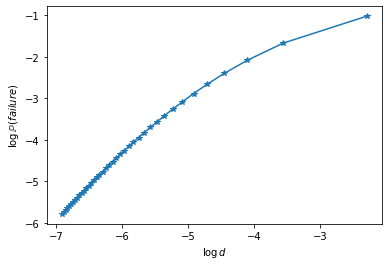

In [3]:
import matplotlib.pyplot as plt

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success.npy")

index = 1-success_list >= 1e-6
d_list = d_list[index]
success_list = success_list[index]

plt.figure()
plt.plot(np.log(d_list), np.log(1-success_list), "-*")
plt.xlabel(r"$\log d$")
plt.ylabel(r"$\log \mathbb{P}(failure)$")
plt.show()

# Deterministic Consumption

In [4]:
# numeric experiment
import numpy as np
from tqdm import tqdm

def Experiment_Deterministic_consumption(C, d1, d2, r1, r2, random_seed, n_experiment):
    np.random.seed(random_seed)

    # generate sample path
    n = int(np.floor(C / (d1 + d2)))
    batch_size = 10000
    success_or_not = np.zeros(n_experiment)
    for batch_id in tqdm(range(n_experiment // batch_size + 1)):
        if batch_id == n_experiment // batch_size:
            index = np.arange(batch_id * batch_size, n_experiment)
        else:
            index = np.arange(batch_id * batch_size, (batch_id+1) * batch_size)
                
        reward_1 = np.random.binomial(n, r1, size=len(index))
        reward_2 = np.random.binomial(n, r2, size=len(index))
#         if d1 < 1e-5:
#             print(f"n {n}, reward_1 {reward_1[0:5]}, reward_2 {reward_2[0:5]}")
#             assert False
        
        if r1 > r2:
            success_or_not[index] = reward_1 > reward_2
        else:
            success_or_not[index] = reward_1 <= reward_2
            
    return np.mean(success_or_not)

# d_list = np.geomspace(start=1e-1, stop=1e-3, num=40)
d_inverse_list = np.linspace(start=1 / 1e-1, stop=1 / 1e-3, num=40)
d_list = 1 / d_inverse_list

n_experiment = 10000000
random_seed = 12345
success_list = np.zeros(len(d_list))
for ii, d in enumerate(d_list):
    r1 = 0.5
    r2 = 0.4
    d1 = d
    d2 = d
    C = 2
    success_rate = Experiment_Deterministic_consumption(C, d1, d2, r1, r2, random_seed, n_experiment)
    print(f"d={d} done")
    success_list[ii] = success_rate
print(success_list)

100%|██████████| 1001/1001 [00:01<00:00, 760.07it/s]


d=0.1 done


100%|██████████| 1001/1001 [00:03<00:00, 324.04it/s]


d=0.02826086956521739 done


100%|██████████| 1001/1001 [00:04<00:00, 210.01it/s]


d=0.016455696202531647 done


100%|██████████| 1001/1001 [00:02<00:00, 426.59it/s]


d=0.011607142857142858 done


100%|██████████| 1001/1001 [00:02<00:00, 444.27it/s]


d=0.008965517241379312 done


100%|██████████| 1001/1001 [00:02<00:00, 479.87it/s]


d=0.007303370786516855 done


100%|██████████| 1001/1001 [00:01<00:00, 500.68it/s]


d=0.006161137440758294 done


100%|██████████| 1001/1001 [00:01<00:00, 516.29it/s]


d=0.005327868852459017 done


100%|██████████| 1001/1001 [00:01<00:00, 522.06it/s]


d=0.004693140794223827 done


100%|██████████| 1001/1001 [00:01<00:00, 534.70it/s]


d=0.004193548387096774 done


100%|██████████| 1001/1001 [00:01<00:00, 543.97it/s]


d=0.003790087463556852 done


100%|██████████| 1001/1001 [00:01<00:00, 550.61it/s]


d=0.0034574468085106385 done


100%|██████████| 1001/1001 [00:01<00:00, 555.13it/s]


d=0.0031784841075794623 done


100%|██████████| 1001/1001 [00:01<00:00, 559.44it/s]


d=0.0029411764705882353 done


100%|██████████| 1001/1001 [00:01<00:00, 563.30it/s]


d=0.002736842105263158 done


100%|██████████| 1001/1001 [00:01<00:00, 574.18it/s]


d=0.002559055118110236 done


100%|██████████| 1001/1001 [00:01<00:00, 582.58it/s]


d=0.002402957486136784 done


100%|██████████| 1001/1001 [00:01<00:00, 591.25it/s]


d=0.002264808362369338 done


100%|██████████| 1001/1001 [00:01<00:00, 595.83it/s]


d=0.00214168039538715 done


100%|██████████| 1001/1001 [00:01<00:00, 595.06it/s]


d=0.00203125 done


100%|██████████| 1001/1001 [00:01<00:00, 601.50it/s]


d=0.0019316493313521548 done


100%|██████████| 1001/1001 [00:01<00:00, 591.17it/s]


d=0.0018413597733711047 done


100%|██████████| 1001/1001 [00:01<00:00, 608.08it/s]


d=0.0017591339648173208 done


100%|██████████| 1001/1001 [00:01<00:00, 614.23it/s]


d=0.001683937823834197 done


100%|██████████| 1001/1001 [00:01<00:00, 624.43it/s]


d=0.0016149068322981368 done


100%|██████████| 1001/1001 [00:01<00:00, 626.64it/s]


d=0.001551312649164678 done


100%|██████████| 1001/1001 [00:01<00:00, 617.26it/s]


d=0.0014925373134328358 done


100%|██████████| 1001/1001 [00:01<00:00, 621.97it/s]


d=0.0014380530973451327 done


100%|██████████| 1001/1001 [00:01<00:00, 632.97it/s]


d=0.0013874066168623267 done


100%|██████████| 1001/1001 [00:01<00:00, 639.49it/s]


d=0.0013402061855670104 done


100%|██████████| 1001/1001 [00:01<00:00, 643.77it/s]


d=0.001296111665004985 done


100%|██████████| 1001/1001 [00:01<00:00, 641.74it/s]


d=0.0012548262548262548 done


100%|██████████| 1001/1001 [00:01<00:00, 642.00it/s]


d=0.0012160898035547241 done


100%|██████████| 1001/1001 [00:01<00:00, 643.45it/s]


d=0.0011796733212341198 done


100%|██████████| 1001/1001 [00:01<00:00, 631.92it/s]


d=0.0011453744493392071 done


100%|██████████| 1001/1001 [00:01<00:00, 646.04it/s]


d=0.001113013698630137 done


100%|██████████| 1001/1001 [00:01<00:00, 651.13it/s]


d=0.0010824313072439634 done


100%|██████████| 1001/1001 [00:01<00:00, 656.28it/s]


d=0.001053484602917342 done


100%|██████████| 1001/1001 [00:01<00:00, 662.72it/s]


d=0.001026045777426993 done


100%|██████████| 1001/1001 [00:01<00:00, 659.98it/s]


d=0.001 done
[0.5919946 0.7661059 0.844795  0.8937074 0.9245282 0.9455487 0.9606314
 0.9710909 0.9788867 0.9844321 0.9883559 0.9913463 0.993534  0.9952082
 0.9964032 0.9972677 0.9979521 0.9984609 0.9988483 0.9991227 0.9993338
 0.9994929 0.9996133 0.999717  0.9997819 0.999827  0.9998625 0.9999023
 0.9999286 0.9999444 0.999959  0.9999676 0.9999775 0.999981  0.9999859
 0.9999894 0.9999921 0.9999932 0.9999945 0.9999959]


In [5]:
np.save("./fail-d-d_list-deterministic.npy", d_list)
np.save("./fail-d-success-deterministic.npy", success_list)

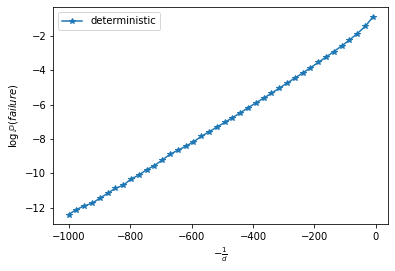

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success.npy")
# index = 1-success_list >= 1e-6 # sift the available record
# d_list = d_list[index]
# success_list = success_list[index]
# plt.plot(np.log(d_list), np.log(1-success_list), "-*", label="stochastic-uncorrelated")

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list-deterministic.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success-deterministic.npy")
index = 1-success_list >= 1e-6 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
plt.plot(-1/d_list, np.log(1-success_list), "-*", label="deterministic")

plt.xlabel(r"$-\frac{1}{d}$")
plt.ylabel(r"$\log \mathbb{P}(failure)$")
plt.legend()
plt.show()

# Plot the figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


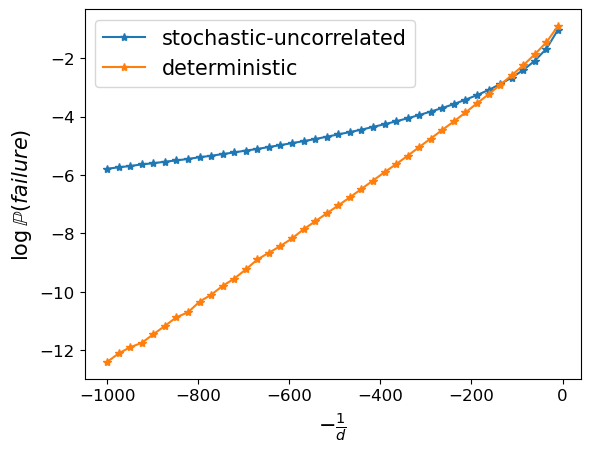

In [1]:
# plot the result
%reset -f
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

legend_fontsize = 15
label_fontsize = 15
axis_fontsize = 12

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure()

d_list = np.load("./fail-d-d_list.npy")
success_list = np.load("./fail-d-success.npy")
index = 1-success_list >= 0 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
plt.plot(-1/d_list, np.log(1-success_list), "-*", label="stochastic-uncorrelated")

d_list = np.load("./fail-d-d_list-deterministic.npy")
success_list = np.load("./fail-d-success-deterministic.npy")
index = 1-success_list >= 0 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
plt.plot(-1/d_list, np.log(1-success_list), "-*", label="deterministic")
# plt.plot(np.log(d_list), np.log(1-success_list), "-*", label="deterministic")

plt.xlabel(r"$-\frac{1}{d}$", fontsize=label_fontsize)
plt.ylabel(r"$\log \mathbb{P}(failure)$", fontsize=label_fontsize)
plt.xticks(fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)

plt.savefig("./validate-formula-inverse_arithmetic_d.eps", bbox_inches='tight')
plt.show()